# LO WFS throughput

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib as mpl
from arte.photometry.eso_sky_calc import EsoSkyCalc
from arte.photometry import morfeo_transmissive_systems

In [2]:
zenith_angle = 30 * u.deg
airmass = 1 / np.cos(zenith_angle.to(u.rad))
sky_no_moon = EsoSkyCalc(airmass = airmass, incl_moon = 'N')

import warnings
warnings.filterwarnings('ignore')

elt = morfeo_transmissive_systems.EltTransmissiveSystem()
elt_te = elt.as_transmissive_element()
low1 = morfeo_transmissive_systems.MorfeoLowOrderChannelTransmissiveSystem_001()
low1_te = low1.as_transmissive_element()
low2 = morfeo_transmissive_systems.MorfeoLowOrderChannelTransmissiveSystem_002()
low2_te = low2.as_transmissive_element()

Note: skycalc_cli v.1.4 output wavelength unit is nm (it is μm in v.1.3)


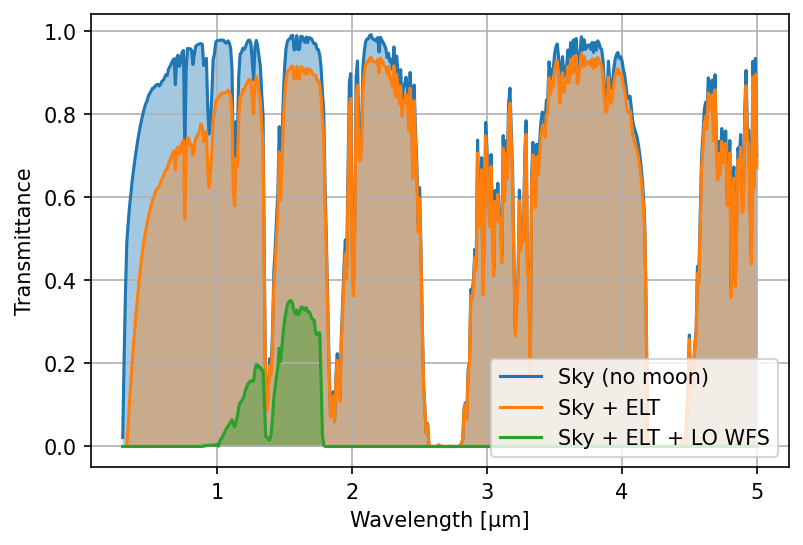

In [3]:
mpl.rcParams['figure.dpi'] = 150

def plot_between(x, y, label, alpha):
    plt.plot(x, y, label=label)
    plt.fill_between(x.value, y, alpha=alpha)

wv = sky_no_moon.lam.to(u.um)
plot_between(wv, sky_no_moon.trans, label='Sky (no moon)', alpha=0.4)
# plot_between(wv, sky_no_moon.trans * elt_te.transmittance(wv), label='Sky + ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 5)(wv), label='Sky + ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2_te.transmittance(wv), label='Sky + ELT + LO WFS', alpha=0.4)
plt.legend(loc='lower right')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.grid()

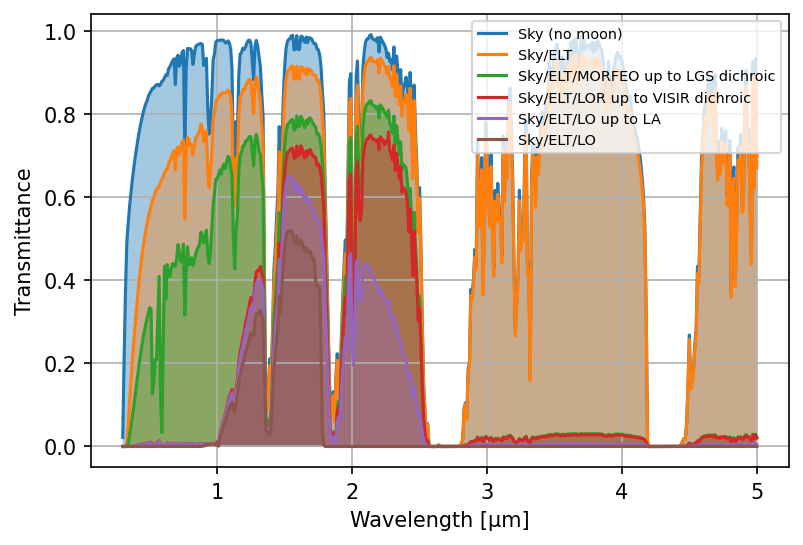

In [13]:
mpl.rcParams['figure.dpi'] = 150


## Idx = 6 is up to first element of MORFEO (CPM) included

wv = sky_no_moon.lam.to(u.um)
plot_between(wv, sky_no_moon.trans, label='Sky (no moon)', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 5)(wv), label='Sky/ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 12)(wv),
             label='Sky/ELT/MORFEO up to LGS dichroic', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 20)(wv),
             label='Sky/ELT/LOR up to VISIR dichroic', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 23)(wv),
             label='Sky/ELT/LO up to LA', alpha=0.4)
plot_between(wv, sky_no_moon.trans * low2.transmittance_from_to(0, 25)(wv),
             label='Sky/ELT/LO', alpha=0.4)
plt.legend(loc='upper right', fontsize='x-small')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.grid()

# LGS WFS throughput

In [5]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib as mpl
from arte.photometry.eso_sky_calc import EsoSkyCalc
from arte.photometry import morfeo_transmissive_systems, transmissive_elements_catalogs

In [6]:
zenith_angle = 30 * u.deg
airmass = 1 / np.cos(zenith_angle.to(u.rad))
sky_no_moon = EsoSkyCalc(airmass = airmass, incl_moon = 'N')

import warnings
warnings.filterwarnings('ignore')

elt = morfeo_transmissive_systems.EltTransmissiveSystem()
elt_te = elt.as_transmissive_element()
lgswfs = morfeo_transmissive_systems.MorfeoLgsChannelTransmissiveSystem_004()
lgswfs_te = lgswfs.as_transmissive_element()

Note: skycalc_cli v.1.4 output wavelength unit is nm (it is μm in v.1.3)


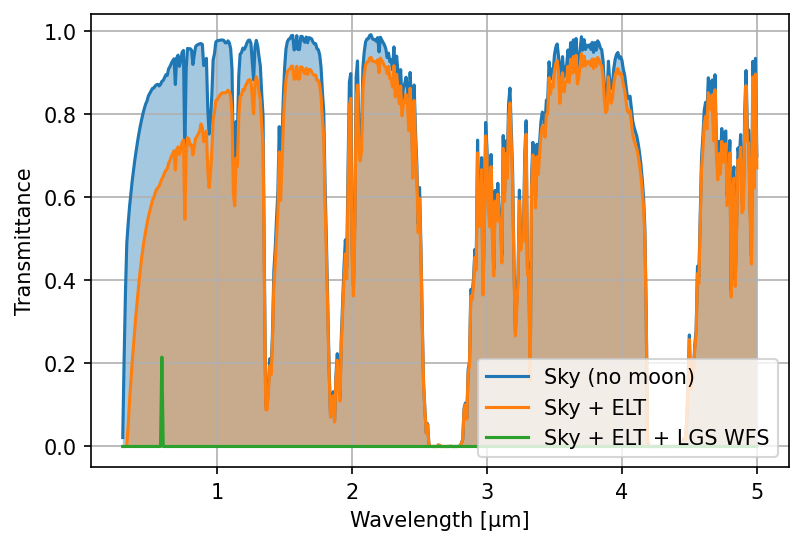

In [7]:
mpl.rcParams['figure.dpi'] = 150

def plot_between(x, y, label, alpha):
    plt.plot(x, y, label=label)
    plt.fill_between(x.value, y, alpha=alpha)

wv = sky_no_moon.lam.to(u.um)
plot_between(wv, sky_no_moon.trans, label='Sky (no moon)', alpha=0.4)
# plot_between(wv, sky_no_moon.trans * elt_te.transmittance(wv), label='Sky + ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 5)(wv), label='Sky + ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs_te.transmittance(wv), label='Sky + ELT + LGS WFS', alpha=0.4)
plt.legend(loc='lower right')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.grid()

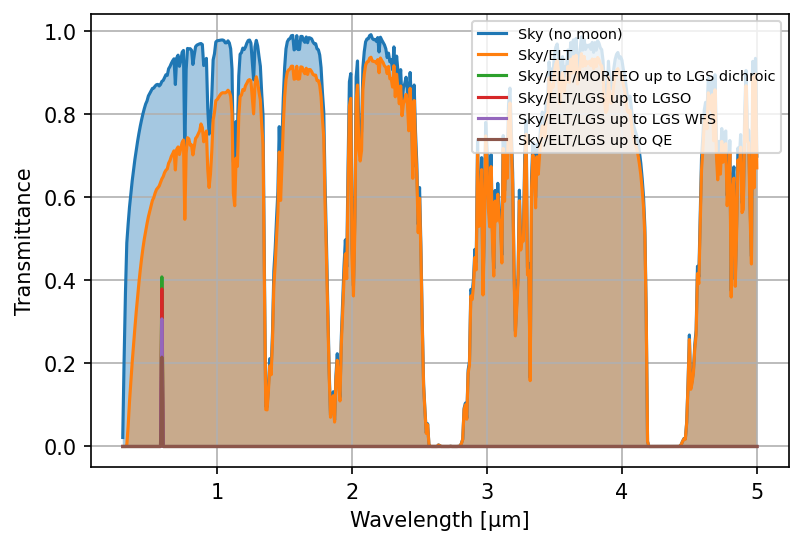

In [8]:
mpl.rcParams['figure.dpi'] = 150


## Idx = 6 is up to first element of MORFEO (CPM) included

wv = sky_no_moon.lam.to(u.um)
plot_between(wv, sky_no_moon.trans, label='Sky (no moon)', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 5)(wv), label='Sky/ELT', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 12)(wv),
             label='Sky/ELT/MORFEO up to LGS dichroic', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 19)(wv),
             label='Sky/ELT/LGS up to LGSO', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 20)(wv),
             label='Sky/ELT/LGS up to LGS WFS', alpha=0.4)
plot_between(wv, sky_no_moon.trans * lgswfs.transmittance_from_to(0, 21)(wv),
             label='Sky/ELT/LGS up to QE', alpha=0.4)
plt.legend(loc='upper right', fontsize='x-small')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.grid()

In [9]:
0.65 * 0.93

0.6045

In [10]:
0.65 / 0.85

0.7647058823529412

In [11]:
0.85 * 0.76**2 * 0.93

0.4565928